In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Análise Olist

Este é um conjunto de dados públicos de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. A seguir vamos responder 3 questoes sobre o conjunto de dados da Olist.
- Qual produto traz mais receita para a Olist?
- Quais estados possuem as maiores vendas em reais?
- Quais estados possuem maior gasto médio por cliente?

###### Importando todos os dfs

In [2]:
link = r'C:\Users\Usuario\Desktop\data\Nova pasta'
df_item = pd.read_csv(f"{link}/order_items.csv")
df_orders = pd.read_csv(f"{link}/orders.csv")
df_products = pd.read_csv(f"{link}/products.csv")
df_geolocation = pd.read_csv(f"{link}/geolocation.csv")
df_sellers = pd.read_csv(f"{link}/sellers.csv")
df_order_pay = pd.read_csv(f"{link}/order_payments.csv")
df_customers = pd.read_csv(f"{link}/customers.csv")
df_category = pd.read_csv(f"{link}/product_category_name_translation.csv")

###### Mesclando datasets

In [3]:
df_train = df_orders.merge(df_item, on='order_id', how='left')
df_train = df_train.merge(df_order_pay, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

print(df_train.shape)

(118434, 33)


###### Função resumo de dados

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [5]:
resumetable(df_train)

Dataset Shape: (118434, 33)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.45
4,order_approved_at,object,176,90733,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.28
5,order_delivered_carrier_date,object,2074,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
6,order_delivered_customer_date,object,3397,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,8.47
8,order_item_id,float64,830,21,1.0,1.0,1.0,0.72
9,product_id,object,830,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63


Considerando que o preço do produto em cada ordem é o valor pago pelo consumidor. Os dados foram agrupados por produto.
A soma dos preços por produto separado equivale ao faturamento resultante de cada produto

In [ ]:
produtos_agrupados_ordem = df_train.groupby('product_id').sum().sort_values('price',ascending=False).reset_index()

Criando um novo df com a ligação entre a categoria do produto e o id

In [ ]:
nomes_produtos = df_products[['product_id','product_category_name']]

Ligando o df que contem o valor o faturamento por produto com o df que contem acategoria por produto

In [ ]:
produtos_agrupados_tot = pd.merge(produtos_agrupados_ordem,nomes_produtos,on='product_id', how='inner').head()

In [83]:
produtos_agrupados_tot[['product_category_name','price']].style.background_gradient()

,product_category_name,price
0,beleza_saude,68485.000000
1,pcs,56948.830000
2,beleza_saude,55779.900000
3,informatica_acessorios,49141.400000
4,cama_mesa_banho,46308.960000


###### Gráfico de barras - produtos com maior faturamento

<BarContainer object of 5 artists>

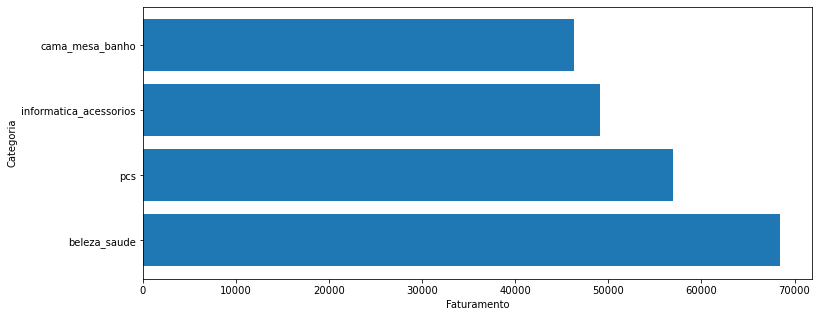

In [84]:
plt.figure(figsize=(12,5))
plt.xlabel('Faturamento')
plt.ylabel('Categoria')
plt.barh(produtos_agrupados_tot['product_category_name'],produtos_agrupados_tot['price'])

Criando um df que será utilizado para unir o estado do consumidor com a ordem

In [ ]:
uf = df_train[['customer_state','order_id']].drop_duplicates()

Agrupando o df pelo numero da ordem e somando todos os preços por ordem. Gerando o valor de venda por ordem. 

In [ ]:
ordens_agrupadas = df_train.groupby('order_id').sum().reset_index().sort_values('price',ascending=False)

In [62]:
ordens_agrupadas.head()

,order_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
1471,03caa2c082116e1d31e67e9ae3700499,36.0,13440.00,224.08,8.0,8.0,109312.64,312.0,19944.0,24.0,6000.0,128.0,128.0,128.0,160640,29336.0
97262,fa65dad1b0e818e3ccc5cb0e39231352,29.0,11383.95,1897.76,435.0,29.0,457.99,1189.0,102776.0,29.0,475600.0,2900.0,870.0,870.0,2263885,2527060.0
29586,4bfcba9e084f46c8e3cb49b0fa6e6159,15.0,10856.10,255.30,120.0,15.0,740.76,900.0,35940.0,30.0,54000.0,540.0,150.0,345.0,85890,193860.0
27340,465c2e1bee4561cb39e0db8c5993aafc,36.0,9888.00,665.28,156.0,32.0,1758.88,672.0,9312.0,48.0,72000.0,720.0,720.0,480.0,310560,1987440.0
94990,f489949dbe23cf9313deb342913ece0c,7.0,9520.14,535.08,28.0,7.0,1436.46,378.0,9618.0,21.0,13300.0,182.0,70.0,140.0,665084,319606.0


Mesclando o df que contem o estado por consumidor com as ordens agrupadas, agora temos todas as ordens, estado e valor de venda em reais.

In [ ]:
ordens_agrupadas_com_uf = pd.merge(ordens_agrupadas,uf,on='order_id',how='inner')

In [65]:
ordens_agrupadas_com_uf.head()

,order_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,customer_state
0,03caa2c082116e1d31e67e9ae3700499,36.0,13440.00,224.08,8.0,8.0,109312.64,312.0,19944.0,24.0,6000.0,128.0,128.0,128.0,160640,29336.0,RJ
1,fa65dad1b0e818e3ccc5cb0e39231352,29.0,11383.95,1897.76,435.0,29.0,457.99,1189.0,102776.0,29.0,475600.0,2900.0,870.0,870.0,2263885,2527060.0,MT
2,4bfcba9e084f46c8e3cb49b0fa6e6159,15.0,10856.10,255.30,120.0,15.0,740.76,900.0,35940.0,30.0,54000.0,540.0,150.0,345.0,85890,193860.0,SP
3,465c2e1bee4561cb39e0db8c5993aafc,36.0,9888.00,665.28,156.0,32.0,1758.88,672.0,9312.0,48.0,72000.0,720.0,720.0,480.0,310560,1987440.0,SP
4,f489949dbe23cf9313deb342913ece0c,7.0,9520.14,535.08,28.0,7.0,1436.46,378.0,9618.0,21.0,13300.0,182.0,70.0,140.0,665084,319606.0,RS


In [52]:
ordens_agrupadas_com_uf[['customer_state','price']].head().style.background_gradient()  

,customer_state,price
0,RJ,13440.000000
1,MT,11383.950000
2,SP,10856.100000
3,SP,9888.000000
4,RS,9520.140000


###### 5 estados com as maiores vendas

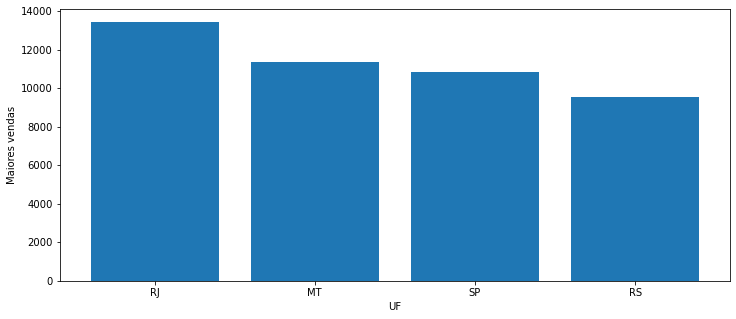

In [66]:
plt.figure(figsize=(12,5))
plt.ylabel('Maiores vendas')
plt.xlabel('UF')
plt.bar(ordens_agrupadas_com_uf['customer_state'][0:5],ordens_agrupadas_com_uf['price'][0:5])
plt.show()

Agrupando o df pelo estado e calculando a média dos preços das ordens.

In [ ]:
uf_mean = df_train.groupby('customer_state').mean()

In [51]:
uf_mean.reset_index()[['customer_state','price']].style.background_gradient()  

,customer_state,price
0,AC,179.573053
1,AL,181.463668
2,AM,133.388070
3,AP,162.551190
4,BA,133.747826
5,CE,154.363791
6,DF,126.594444
7,ES,121.427686
8,GO,127.503794
9,MA,145.594538


###### Média de gastos por consumidor

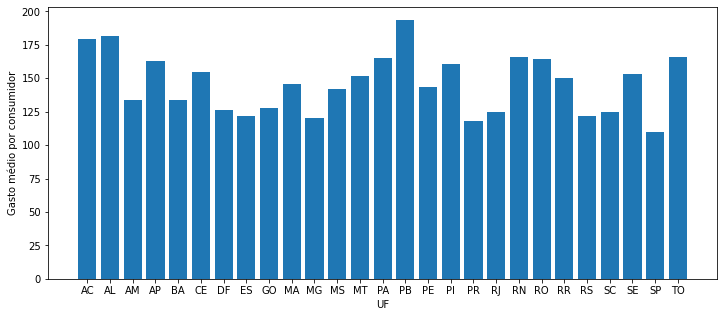

In [67]:
plt.figure(figsize=(12,5))
plt.ylabel('Gasto médio por consumidor')
plt.xlabel('UF')
plt.bar(uf_mean.index,uf_mean['price'])
plt.show()